In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/CNN_FILES_DS_US/training_set.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [5]:
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/CNN_FILES_DS_US/test_set.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [7]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [8]:
conv_base.trainable = True

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True # These parameters will be trained in training phase. will loose out on pretrained weights

  if set_trainable == True:
    layer.trainable = True
  else :
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name, layer.trainable)


input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [13]:
# create CNN model
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 9177089 (35.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [15]:
# generators
train_ds = keras.utils.image_dataset_from_directory(directory='/content/training_set',
                                                    labels='inferred',
                                                    label_mode='int',
                                                    batch_size=32,
                                                    image_size=(150, 150))

validation_ds = keras.utils.image_dataset_from_directory(directory='/content/test_set',
                                                         labels='inferred',
                                                         label_mode='int',
                                                         batch_size=32,
                                                         image_size=(150, 150))

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [16]:
# normalize

def process(image, label):
  image = tensorflow.cast(image/255., tensorflow.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
251/251 [==============================] - 40s 125ms/step - loss: 0.2974 - accuracy: 0.8738 - val_loss: 0.2423 - val_accuracy: 0.8962
Epoch 2/10
251/251 [==============================] - 28s 109ms/step - loss: 0.1639 - accuracy: 0.9342 - val_loss: 0.2342 - val_accuracy: 0.8997
Epoch 3/10
251/251 [==============================] - 28s 109ms/step - loss: 0.1138 - accuracy: 0.9569 - val_loss: 0.1881 - val_accuracy: 0.9179
Epoch 4/10
251/251 [==============================] - 28s 109ms/step - loss: 0.0811 - accuracy: 0.9719 - val_loss: 0.1610 - val_accuracy: 0.9372
Epoch 5/10
251/251 [==============================] - 27s 109ms/step - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.2085 - val_accuracy: 0.9194
Epoch 6/10
251/251 [==============================] - 27s 107ms/step - loss: 0.0398 - accuracy: 0.9886 - val_loss: 0.1732 - val_accuracy: 0.9357
Epoch 7/10
251/251 [==============================] - 28s 110ms/step - loss: 0.0245 - accuracy: 0.9943 - val_loss: 0.1690 - val_ac

In [20]:
model.evaluate(validation_ds)

64/64 [==============================] - 5s 72ms/step - loss: 0.2466 - accuracy: 0.9308


[0.24659065902233124, 0.9307958483695984]

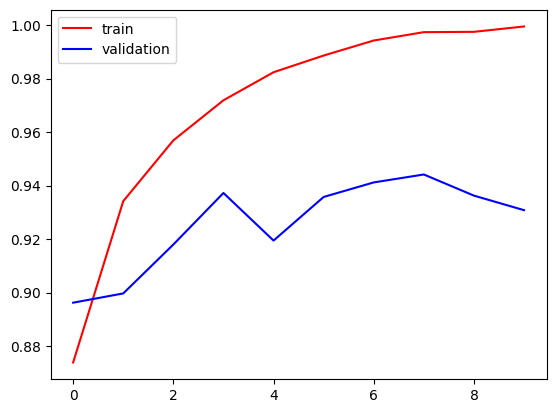

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()